CONTENT
- import librarier - install geopandas
- import geodata, search for key
- create new columns for map (yes/no according to voting-district)
- rename column and merge data set (pd_ve and geo)
- create coropleth map
- comment

# import libraries and data 
to read the available .shp files it is neccessary to import geopandas 

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import geopandas

In [78]:
# defining path
path=r'/Users/ru/Desktop/CF/06_Achievement 6_VE'

In [79]:
# import data Referendum
df_ve = pd.read_csv(os.path.join(path,'02_06_Data','2.2_06_Prepared Data',
                                 'df_ve_wrangled.csv'), sep=',', encoding='cp1252')

In [80]:
# import geodata
geo = geopandas.read_file(os.path.join(path,'02_06_Data','2.1_06_Original Data','RBS_OD_UWB_AH21(1)','RBS_OD_UWB_AH21.shp'))
                                      
                                      
                                     

In [81]:
geo

,UWB,UWB3,BWB,BWB3,AWK,BEZ,BWK,geometry
0,01100,100,011A,1A,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
1,01101,101,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
2,01102,102,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
3,01103,103,011C,1C,0101,01,75,"POLYGON ((3.9e+05 5.82e+06, 3.9e+05 5.82e+06, ..."
4,01104,104,011D,1D,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.9e+05 5.82e+06,..."
...,...,...,...,...,...,...,...,...
2252,12622,622,126T,6T,1206,12,77,"POLYGON ((3.85e+05 5.83e+06, 3.85e+05 5.83e+06..."
2253,12623,623,126S,6S,1206,12,77,"POLYGON ((3.86e+05 5.83e+06, 3.86e+05 5.83e+06..."
2254,12624,624,126U,6U,1206,12,77,"POLYGON ((3.84e+05 5.83e+06, 3.84e+05 5.83e+06..."
2255,12625,625,126V,6V,1206,12,77,"POLYGON ((3.85e+05 5.83e+06, 3.85e+05 5.83e+06..."


In [82]:
# check if there is a difference in shp and shx files concerning content
geo2 = geopandas.read_file(os.path.join(path,'02_06_Data','2.1_06_Original Data','RBS_OD_UWB_AH21(1)','RBS_OD_UWB_AH21.shx'))

In [83]:
geo2

,UWB,UWB3,BWB,BWB3,AWK,BEZ,BWK,geometry
0,01100,100,011A,1A,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
1,01101,101,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
2,01102,102,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
3,01103,103,011C,1C,0101,01,75,"POLYGON ((3.9e+05 5.82e+06, 3.9e+05 5.82e+06, ..."
4,01104,104,011D,1D,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.9e+05 5.82e+06,..."
...,...,...,...,...,...,...,...,...
2252,12622,622,126T,6T,1206,12,77,"POLYGON ((3.85e+05 5.83e+06, 3.85e+05 5.83e+06..."
2253,12623,623,126S,6S,1206,12,77,"POLYGON ((3.86e+05 5.83e+06, 3.86e+05 5.83e+06..."
2254,12624,624,126U,6U,1206,12,77,"POLYGON ((3.84e+05 5.83e+06, 3.84e+05 5.83e+06..."
2255,12625,625,126V,6V,1206,12,77,"POLYGON ((3.85e+05 5.83e+06, 3.85e+05 5.83e+06..."


In [84]:
# searching for key column
geo.head(20)

,UWB,UWB3,BWB,BWB3,AWK,BEZ,BWK,geometry
0,01100,100,011A,1A,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
1,01101,101,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
2,01102,102,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06..."
3,01103,103,011C,1C,0101,01,75,"POLYGON ((3.9e+05 5.82e+06, 3.9e+05 5.82e+06, ..."
4,01104,104,011D,1D,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.9e+05 5.82e+06,..."
5,01105,105,011D,1D,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.91e+05 5.82e+06..."
6,01106,106,011E,1E,0101,01,75,"POLYGON ((3.9e+05 5.82e+06, 3.91e+05 5.82e+06,..."
7,01107,107,011F,1F,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.91e+05 5.82e+06..."
8,01108,108,011E,1E,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.91e+05 5.82e+06..."
9,01109,109,011G,1G,0101,01,75,"POLYGON ((3.91e+05 5.82e+06, 3.91e+05 5.82e+06..."


# preparing the map

In [85]:
# Creating a extra column with results in the referendum dataframe
df_ve.columns

Index(['Unnamed: 0', 'Stimmart', 'Adresse', 'BezNr', 'BezNa', 'WahlBez',
       'WahlBezArt', 'BriefwahlBez', 'AGHWK', 'BTWK', 'OstWest',
       'Stimmber  total', 'Stimmber A1', 'Stimmber A2', 'Stimmber A3', 'TeilN',
       'TeilN B1', 'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein',
       'Unnamed: 20'],
      dtype='object')

In [86]:
# assigning yes and no
df_ve['Ergebnis'] = np.where(df_ve['Stimme Ja'] > df_ve['Stimme  Nein'], 'yes', 'no')


In [87]:
df_ve.head()

,Unnamed: 0,Stimmart,Adresse,BezNr,BezNa,WahlBez,WahlBezArt,BriefwahlBez,AGHWK,BTWK,...,Stimmber A2,Stimmber A3,TeilN,TeilN B1,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein,Unnamed: 20,Ergebnis
0,0,Stimme,01W100,1,Mitte,100,W,011A,1,75,...,741,0,519,12,11,508,299,209,NaN,yes
1,1,Stimme,01W101,1,Mitte,101,W,011B,1,75,...,490,0,366,10,6,360,182,178,NaN,yes
2,2,Stimme,01W102,1,Mitte,102,W,011B,1,75,...,692,0,406,10,8,398,217,181,NaN,yes
3,3,Stimme,01W103,1,Mitte,103,W,011C,1,75,...,569,0,329,10,9,320,159,161,NaN,no
4,4,Stimme,01W104,1,Mitte,104,W,011D,1,75,...,639,0,522,17,10,512,263,249,NaN,yes


In [88]:
# rename column Briefwahlbezirk (key) in referendum data
df_ve.rename(columns = {'BriefwahlBez' : 'BWB'}, inplace = True)

In [89]:
df_ve.columns

Index(['Unnamed: 0', 'Stimmart', 'Adresse', 'BezNr', 'BezNa', 'WahlBez',
       'WahlBezArt', 'BWB', 'AGHWK', 'BTWK', 'OstWest', 'Stimmber  total',
       'Stimmber A1', 'Stimmber A2', 'Stimmber A3', 'TeilN', 'TeilN B1',
       'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein',
       'Unnamed: 20', 'Ergebnis'],
      dtype='object')

In [90]:
# reduce data: only the columns that shall be in the map
data_to_plot = df_ve[['BWB','Ergebnis']]
data_to_plot.head()

,BWB,Ergebnis
0,011A,yes
1,011B,yes
2,011B,yes
3,011C,no
4,011D,yes


In [91]:
# merge referendum data with geodata
merged = geo.merge(data_to_plot, left_on='BWB', right_on='BWB')

In [92]:
# save merged data
merged.to_csv(os.path.join(path, '02_06_Data','2.2_06_Prepared Data', 'df_ve_geo_data_to_plot.csv'))

In [93]:
merged.head()

,UWB,UWB3,BWB,BWB3,AWK,BEZ,BWK,geometry,Ergebnis
0,01100,100,011A,1A,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06...",yes
1,01100,100,011A,1A,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06...",yes
2,01100,100,011A,1A,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06...",yes
3,01101,101,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06...",yes
4,01101,101,011B,1B,0101,01,75,"POLYGON ((3.89e+05 5.82e+06, 3.89e+05 5.82e+06...",yes


# create coropleth map

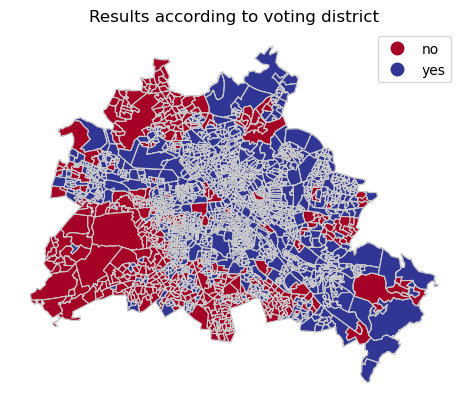

In [94]:
ax = merged.plot(column='Ergebnis', cmap='RdYlBu', legend=True, linewidth=0.8, edgecolor='0.8', missing_kwds={"color": "lightgrey"})

ax.set_axis_off() 
plt.title('Results according to voting district') 

plt.savefig(os.path.join(path,'04_06_Analysis','4.3_06_visualizations','ergebnisse_briefwahlbezirk.png'), dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

COMMENT
The map shows the distribution of yes and no votes in the differend voting-districts (merged on briefwahlbezirk)
Concerning the Questions it shows two things at the same time. It is a difference in center and periphery as well as in east and west. (note: west and east are historical/political terms not geographical)
The center votes for the referendum with yes, as well as big parts of the eastern periphery, whereas the western periphery votes with no.

In [95]:
df_ve.to_pickle(os.path.join(path, '02_06_Data','2.2_06_Prepared Data', 'df_ve_clean_y_n.pkl'))



In [99]:
df_ve.to_csv(os.path.join(path, '02_06_Data','2.2_06_Prepared Data', 'df_ve_clean_y_n.csv'))


In [96]:
# reduce data again: only the columns that shall be in the 2. map
data_to_plot2 = df_ve[['BWB','OstWest']]
data_to_plot2.head()

,BWB,OstWest
0,011A,W
1,011B,O
2,011B,O
3,011C,O
4,011D,O


In [100]:
# merge referendum data(ost west) with geodata
merged2 = geo.merge(data_to_plot2, left_on='BWB', right_on='BWB')

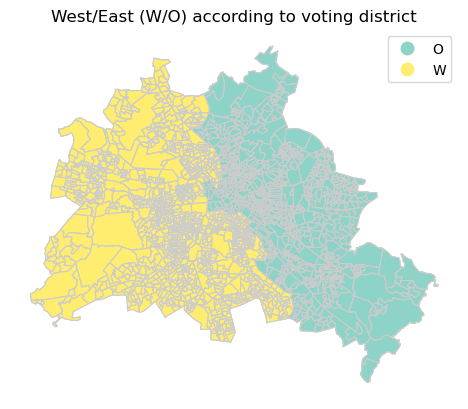

In [101]:
# choropleth map 2 wit information west/east
ax2 = merged2.plot(column='OstWest', cmap='Set3', legend=True, linewidth=0.8, edgecolor='0.8', missing_kwds={"color":"lightgrey"}) 
ax2.set_axis_off() 
plt.title('West/East (W/O) according to voting district') 
plt.savefig(os.path.join(path, '04_06_Analysis', '4.3_06_visualizations', 'west_ost_briefwahlbezirk.png'), dpi=300, bbox_inches='tight') 
plt.show() 
plt.close()

In [102]:
# save merged2 data
merged2.to_csv(os.path.join(path, '02_06_Data','2.2_06_Prepared Data', 'df_ve_geo_data_to_plot_W_O.csv'))